# Определение перспективного тарифа для телеком-компании

В нашем распоряжении данные компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st
data_calls = pd.read_csv('/datasets/calls.csv')
display(data_calls.head(10)) # получение таблицы
data_calls.info() # получение общей информации о данных в таблице
data_calls['call_date'].describe()
data_calls['duration'].describe()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Открыв первый датасет видим 4 колонки и 202607 строк. В колонках нет пропусков, присутствуют данные типа float64(1), int64(1), object(2). В датасете предствалены данные по звонкам (дата и длительностть), идентификатор пользователя и уникальный номер звонка (id).
Также посмотрели на данные столбца call_date, из него видим, что данные представлены за год.
Изучили данные по длительности звонков. Есть нулевые значения, но мы знаем, что это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

In [2]:
data_internet = pd.read_csv('/datasets/internet.csv')
display(data_internet.head(10)) # получение таблицы
data_internet.info() # получение общей информации о данных в таблице
data_internet['mb_used'].describe()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Во втором датасете предствалены данные по пользованию интернетом: 5 колонок, 149396 столбцов, пропусков нет, присутствуют данные типа float64, int64, object. В этом датасета id обозначет уникалый номер сессии.
В mb_used видим, что минимальное значение 0. Это можно принять за ошибку данных, но, возможно, это те пользователи, которые не пользуются интернетом.

In [3]:
data_messages = pd.read_csv('/datasets/messages.csv')
display(data_messages.head(10)) # получение таблицы
data_messages.info() # получение общей информации о данных в таблице

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Во третьем датасете предствалены данные по пользованию сообщениями: 3 колонки, 123036 столбцов, пропусков нет, присутствуют данные типа int64, object. В этом датасета id обозначет уникалый номер сообщения.

In [4]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
display(data_tariffs.head(10)) # получение таблицы
data_tariffs.info() # получение общей информации о данных в таблице

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В этом датасете присутсвтвуют данные о тарифах, представлены в 2 строках и 8 колонках, тип данных int64, object, пропусков нет.

In [5]:
data_users = pd.read_csv('/datasets/users.csv')
display(data_users.head(10)) # получение таблицы
data_users.info() # получение общей информации о данных в таблице
data_users['city'].unique()
data_users['age'].value_counts()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


53    14
42    14
63    13
71    13
64    13
73    12
21    12
40    12
39    11
47    11
29    11
26    11
37    11
41    10
36    10
58    10
45    10
70    10
52    10
51     9
27     9
48     9
50     9
28     9
30     9
24     9
20     9
19     9
56     9
23     9
68     9
66     9
65     9
69     8
62     8
60     8
44     8
55     8
25     7
43     7
67     7
35     7
74     7
32     7
31     7
46     7
75     6
54     6
59     6
18     6
33     5
34     5
38     5
22     5
72     5
49     4
57     4
61     3
Name: age, dtype: int64

В этом датасете представлены данные о пользователях. Видим 500 строк и 8 колонок. Присутствуют пропуски в колонке churn_date 
- это дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных).
Посмотрели столбцы city и age - никаких аномалий не обнаружили.


### Вывод

Открыв данные из 5 источников, мы имеем 5 таблиц с разным количеством строк. 4 таблицы имеют общую колонку - это user_id. В остальных видим, что в столбцах с одинаковым названем содержатся разные данные. 1 датасет предствадяет собой информацию о тарифах. 

## Подготовка данных

In [6]:
# приводим данные к нужному типу
# для начала изменим данных в data_calls['call_date'] на datetime
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
# выделим месяц в отдельную категорию и поместим эти данные в отдельный столбец, так как это потребуется для дальнейшего анализа
data_calls['month'] = data_calls['call_date'].dt.month
# округлим минуты в duration в большую сторону
data_calls['duration'] = data_calls['duration'].apply(np.ceil)

In [7]:
# в таблице data_internet изменим данных в data_internet['session_date'] на datetime и тоже выделим столбец month
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet['month'] = data_internet['session_date'].dt.month


In [8]:
# в таблице data_messages изменим данных в data_messages['session_date'] на datetime и тоже выделим столбец month
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages['month'] = data_messages['message_date'].dt.month


In [9]:
# в таблице data_users изменим данных в data_users['reg_date'] на datetime 
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')


В таблице data_calls видим значения 0, однако их не будем трогать, так как нулями обозначены пропущенные звонки


In [10]:
# в таблице data_internet также видим значения 0
# возможно,это пользователи, которые не пользуются мобильным интернетом, но он включен в тариф
data_internet['mb_used'].describe()
data_internet['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

### Далее сделаем таблицы  и расчитаем необходимые показатели

In [11]:
# посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам
calls_pivot = data_calls.pivot_table(index = ['user_id', 'month'], values='duration', aggfunc = 'sum')
display(calls_pivot)

duration
user_id month          
1000    5         159.0
        6         172.0
        7         340.0
        8         408.0
        9         466.0
...                 ...
1498    10        247.0
1499    9          70.0
        10        449.0
        11        612.0
        12        492.0

[3174 rows x 1 columns]

In [12]:
# посчитаем для каждого пользователя количество отправленных сообщений по месяцам
messages_pivot = data_messages.pivot_table(index = ['user_id', 'month'], values='id', aggfunc = 'count')
messages_pivot.columns = ['total_messages']
display(messages_pivot)

total_messages
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

In [13]:
# посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам с округлением в большую сторону
internet_pivot = data_internet.pivot_table(index = ['user_id', 'month'], values='mb_used', aggfunc = 'sum')
internet_pivot.columns = ['total_traffic_mb']
internet_pivot['total_traffic_gb'] = (internet_pivot['total_traffic_mb'] / 1024).apply(np.ceil)
display(internet_pivot)

total_traffic_mb  total_traffic_gb
user_id month                                    
1000    5               2253.49               3.0
        6              23233.77              23.0
        7              14003.64              14.0
        8              14055.93              14.0
        9              14568.91              15.0
...                         ...               ...
1498    10             20579.36              21.0
1499    9               1845.75               2.0
        10             17788.51              18.0
        11             17963.31              18.0
        12             13055.58              13.0

[3203 rows x 2 columns]

In [14]:
# объединяем таблицы для дальнейших подсчетов
final_data = (
    calls_pivot.merge(
        messages_pivot, on=['user_id', 'month'], how='outer').merge(
        internet_pivot['total_traffic_gb'], on=['user_id', 'month'], how='outer')
).reset_index()
display(final_data)

,user_id,month,duration,total_messages,total_traffic_gb
0,1000,5,159.0,22.0,3.0
1,1000,6,172.0,60.0,23.0
2,1000,7,340.0,75.0,14.0
3,1000,8,408.0,81.0,14.0
4,1000,9,466.0,57.0,15.0
...,...,...,...,...,...
3209,1489,9,NaN,32.0,17.0
3210,1489,10,NaN,21.0,20.0
3211,1489,11,NaN,20.0,18.0
3212,1489,12,NaN,35.0,17.0


In [15]:
# объдиним таблицу с данными по пользователям
final_data = final_data.merge(data_users[['user_id', 'city', 'tariff']], on='user_id', how='left')
display(final_data)

,user_id,month,duration,total_messages,total_traffic_gb,city,tariff
0,1000,5,159.0,22.0,3.0,Краснодар,ultra
1,1000,6,172.0,60.0,23.0,Краснодар,ultra
2,1000,7,340.0,75.0,14.0,Краснодар,ultra
3,1000,8,408.0,81.0,14.0,Краснодар,ultra
4,1000,9,466.0,57.0,15.0,Краснодар,ultra
...,...,...,...,...,...,...,...
3209,1489,9,NaN,32.0,17.0,Санкт-Петербург,smart
3210,1489,10,NaN,21.0,20.0,Санкт-Петербург,smart
3211,1489,11,NaN,20.0,18.0,Санкт-Петербург,smart
3212,1489,12,NaN,35.0,17.0,Санкт-Петербург,smart


In [16]:
# присоединим таблицу с данными по тарифам к основной таблице и переведем мегабайты в гигабайты
final_data = final_data.merge(data_tariffs.rename(columns={'tariff_name': 'tariff'}), on='tariff')
final_data['gb_per_month_included'] = (final_data['mb_per_month_included'] / 1024).apply(np.ceil)
display(final_data)

,user_id,month,duration,total_messages,total_traffic_gb,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,159.0,22.0,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0
1,1000,6,172.0,60.0,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0
2,1000,7,340.0,75.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0
3,1000,8,408.0,81.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0
4,1000,9,466.0,57.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,17.0,11.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0
3210,1489,9,NaN,32.0,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0
3211,1489,10,NaN,21.0,20.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0
3212,1489,11,NaN,20.0,18.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0


In [17]:
# создаем функцию для подсчета дохода с каждого абонента
def income(row):
    minutes_over = (row['duration'] - row['minutes_included']) * row['rub_per_minute']
    messages_over = (row['total_messages'] - row['messages_included']) * row['rub_per_message']
    gb_over = (row['total_traffic_gb'] - row['gb_per_month_included']) * row['rub_per_gb']
    if minutes_over < 0:
        minutes_over = 0
    if messages_over < 0:
        messages_over = 0
    if gb_over < 0:
        gb_over = 0
    return minutes_over + messages_over + gb_over + row['rub_monthly_fee']

final_data['total_income'] = final_data.apply(income, axis = 1)
 

In [18]:
final_data['total_income'].describe()

count    2667.00000
mean     1504.47994
std       796.07941
min       550.00000
25%       747.50000
50%      1550.00000
75%      1950.00000
max      6770.00000
Name: total_income, dtype: float64

In [19]:
# выводим общую таблицу с вырочкой по каждому клиенту
display(final_data)

,user_id,month,duration,total_messages,total_traffic_gb,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,total_income
0,1000,5,159.0,22.0,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
1,1000,6,172.0,60.0,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
2,1000,7,340.0,75.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
3,1000,8,408.0,81.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
4,1000,9,466.0,57.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,17.0,11.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN
3210,1489,9,NaN,32.0,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN
3211,1489,10,NaN,21.0,20.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN
3212,1489,11,NaN,20.0,18.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN


### Вывод


На данном этапе произвели подготовку данных. Для некоторых столбцов изменили на datetime, чтобы можно было выделить месяц.
В звонках и трафике были обнаружены нулевые значения, однако логичнее всего их не трогать, так как это значит, что человек либо не пользовался услугой в тарифе, либо  это пропущенные звонки.

Далее посчитали для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, израсходованный трафик по месяцам, предварительно переведя мегабайты в гигабайты.

На последнем этапе посчитали выручку с каждого клиента.

## Анализ данных

### Проанализируем поведение пользователей тарифа smart  и ultra относительно звонков

In [20]:
# сделаем срез данных для пользователей тарифа smart и изучим характерные значения длительности звонков
smart_users = final_data.query('tariff =="smart"')
display(smart_users)
smart_users['duration'].describe()

,user_id,month,duration,total_messages,total_traffic_gb,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,total_income
985,1001,11,430.0,NaN,18.0,Москва,smart,50,15360,500,550,200,3,3,15.0,NaN
986,1001,12,414.0,NaN,14.0,Москва,smart,50,15360,500,550,200,3,3,15.0,NaN
987,1002,6,117.0,4.0,11.0,Стерлитамак,smart,50,15360,500,550,200,3,3,15.0,550.0
988,1002,7,214.0,11.0,18.0,Стерлитамак,smart,50,15360,500,550,200,3,3,15.0,1150.0
989,1002,8,289.0,13.0,20.0,Стерлитамак,smart,50,15360,500,550,200,3,3,15.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,17.0,11.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN
3210,1489,9,NaN,32.0,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN
3211,1489,10,NaN,21.0,20.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN
3212,1489,11,NaN,20.0,18.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,15.0,NaN


count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: duration, dtype: float64

Видим, что в среднем пользователи тарифа smart используют 419 мин в месяц, медианное значение - 423 мин, при максимальном 1435 и минимальном 0.

In [21]:
# сделаем срез данных для пользователей тарифа ultra и изучим характерные значения длительности звонков
ultra_users = final_data.query('tariff =="ultra"')
display(ultra_users)
ultra_users['duration'].describe()

,user_id,month,duration,total_messages,total_traffic_gb,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,total_income
0,1000,5,159.0,22.0,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
1,1000,6,172.0,60.0,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
2,1000,7,340.0,75.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
3,1000,8,408.0,81.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
4,1000,9,466.0,57.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1473,9,NaN,19.0,17.0,Красноярск,ultra,1000,30720,3000,1950,150,1,1,30.0,NaN
981,1473,10,NaN,20.0,14.0,Красноярск,ultra,1000,30720,3000,1950,150,1,1,30.0,NaN
982,1473,11,NaN,14.0,22.0,Красноярск,ultra,1000,30720,3000,1950,150,1,1,30.0,NaN
983,1473,12,NaN,20.0,18.0,Красноярск,ultra,1000,30720,3000,1950,150,1,1,30.0,NaN


count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: duration, dtype: float64

Видим, что в среднем пользователи тарифа ultra используют 545 мин в месяц, медианное значение - 528 мин, при максимальном 1673 и минимальном 0.

In [22]:
# считаем среднее для тарифа smart
mean_duration_smart = smart_users['duration'].mean()
print("Среднее значение минут по тарифу smart", mean_duration_smart)

# считаем среднее для тарифа ultra
mean_duration_ultra = ultra_users['duration'].mean()
print("Среднее значение минут по тарифу ultra", mean_duration_ultra)

Среднее значение минут по тарифу smart 419.0629779577148
Среднее значение минут по тарифу ultra 545.4511041009464


In [23]:
# читаем дисперсию для звонков тарифа smart
variance_duration_smart = np.var(smart_users['duration'], ddof=1)
print('Дисперсия для звонков тарифа smart', variance_duration_smart)

# читаем дисперсию для звонков тарифа ultra
variance_duration_ultra = np.var(ultra_users['duration'], ddof=1)
print('Дисперсия для звонков тарифа ultra', variance_duration_ultra)

Дисперсия для звонков тарифа smart 35844.1895513438
Дисперсия для звонков тарифа ultra 94203.41839614812


In [24]:
# находим стандартное отклонение для звонков в тарифе smart
st_duration_smart = np.sqrt(variance_duration_smart)
print('Стандартное отклонение длительности звонков по тарифу smart', st_duration_smart)

# находим стандартное отклонение для звонков в тарифе ultra
st_duration_ultra = np.sqrt(variance_duration_ultra)
print('Стандартное отклонение длительности звонков по тарифу ultra', st_duration_ultra)

Стандартное отклонение длительности звонков по тарифу smart 189.3256177894154
Стандартное отклонение длительности звонков по тарифу ultra 306.92575388218586


Text(0.5, 1.0, 'Гистограмма звонков тарифа smart')

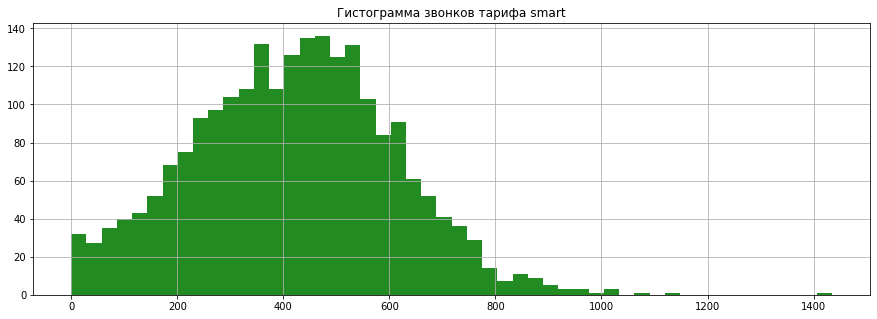

In [25]:
# строим гистограмму для тарифа smart
smart_users['duration'].hist(bins=50, figsize=(15,5), color='forestgreen')
plt.title('Гистограмма звонков тарифа smart')

Из гистограммы видим, что в основном длительность звонков находится в итервале от 200 до 620 минут. Звонки длиннее 700 минут встречаются гораздо реже, и видим аномально долгие звонки, превышающие 1000 мин.

Text(0.5, 1.0, 'Гистограмма звонков тарифа ultra')

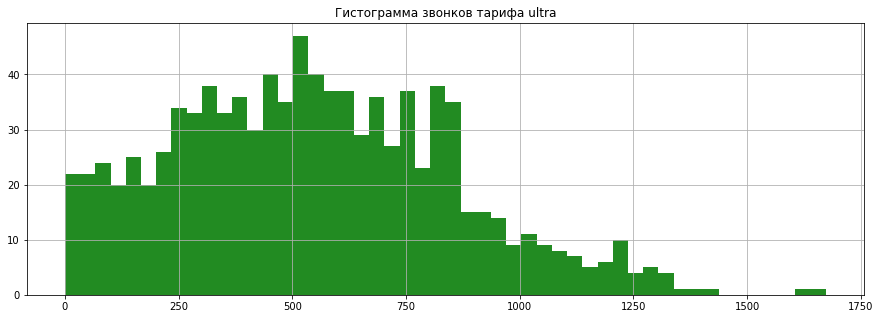

In [26]:
# строим гистограмму для тарифа ultra
ultra_users['duration'].hist(bins=50, figsize=(15,5), color='forestgreen')
plt.title('Гистограмма звонков тарифа ultra')

Из гистаграммы видим, что в основном длительность звонков в тарифе ultra находится в итервале от 200 до 850 минут. Далее видим плавный "хвост" звонков. В данном тарифе видно, что более долгие звонки встречаются чаще, и аномально большие значения находятся в диапазоне 1600 мин.

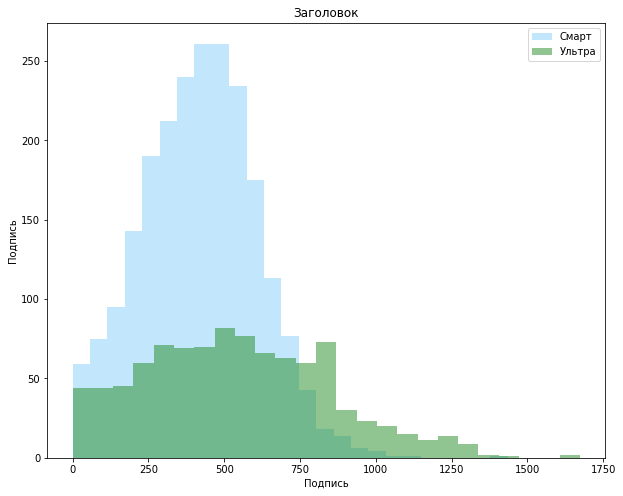

In [27]:
# КОД РЕВЬЮЕРА

# =========== Задаю цветовую палитру 

import seaborn as sns
colors = ['lightskyblue', 'forestgreen']
sns.set_palette(colors)

# ============

final_data.groupby('tariff')['duration'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Смарт', 'Ультра'])
plt.title('Заголовок')
plt.xlabel('Подпись')
plt.ylabel('Подпись')

plt.show()

### Вывод


Проанализировав данные длительности звонков 2х тарифов можно сделать вывод, что средняя и медианная длительность звонков в тарифах smart и ultra отличается Среднее значение минут по тарифу smart 419 и среднее значение минут по тарифу ultra 545. Пользоватнли тарифа ultra соверают более длинные звонки. 

Стандартное отклонение длительности звонков по тарифу smart составляет 189 и по тарифу ultra 306. Для тарифа ultra коллебания выше, что видно на гистаграмме.

Из гистаграммы видим, что в основном длительность звонков для тарифа smart находится в итервале от 200 до 620 минут. Звонки длиннее 700 минут встречаются гораздо реже, и видим аномально долгие звонки, превышающие 1000 мин. Длительность звонков в тарифе ultra находится в интервале от 200 до 850 минут. В данном тарифе видно, что более долгие звонки встречаются чаще, и аномально большие значения находятся в диапазоне 1600 мин.




### Проанализируем поведение пользователей тарифа smart  и ultra относительно сообщений

In [28]:
# посмотрим на основную информацию по сообщениям по обоим тарифам
smart_users['total_messages'].describe()

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: total_messages, dtype: float64

Видим, что в среднем пользователи тарифа smart отправляют по 38 сообщений в месяц. Медиана - 34 сообщения, минимальное - 1 и максимальное - 143.

In [29]:
ultra_users['total_messages'].describe()

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: total_messages, dtype: float64

Видим, что в среднем пользователи тарифа ultra отправляют в полтора раза больше сообщений по сравнению с тарифом smart - 61 сообщений в месяц. Медиана - 51 сообщения, минимальное - 1 и максимальное - 224.

In [30]:
# считаем среднее для тарифа smart
mean_messages_smart = smart_users['total_messages'].mean()
print("Среднее значение сообщений по тарифу smart", mean_messages_smart)

# считаем среднее дл тарифа ultra
mean_messages_ultra = ultra_users['total_messages'].mean()
print("Среднее значение сообщений по тарифу ultra", mean_messages_ultra)

Среднее значение сообщений по тарифу smart 38.71644120707596
Среднее значение сообщений по тарифу ultra 61.161006289308176


In [31]:
# читаем дисперсию для сообщений тарифа smart
variance_messages_smart = np.var(smart_users['total_messages'], ddof=1)
print('Дисперсия для сообщений тарифа smart', variance_messages_smart)

# читаем дисперсию для сообщений тарифа ultra
variance_messages_ultra = np.var(ultra_users['total_messages'], ddof=1)
print('Дисперсия для сообщений тарифа ultra', variance_messages_ultra)

Дисперсия для сообщений тарифа smart 717.5942011753547
Дисперсия для сообщений тарифа ultra 2109.6591828651995


In [32]:
# находим стандартное отклонение для сообщений в тарифе smart
st_messages_smart = np.sqrt(variance_messages_smart)
print('Стандартное отклонение сообщений по тарифу smart', st_messages_smart)

# находим стандартное отклонение для сообщений в тарифе ultra
st_messages_ultra = np.sqrt(variance_messages_ultra)
print('Стандартное отклонение сообщений по тарифу ultra', st_messages_ultra)

Стандартное отклонение сообщений по тарифу smart 26.787948804926344
Стандартное отклонение сообщений по тарифу ultra 45.93102636416042


Text(0.5, 1.0, 'Гистограмма сообщений тарифа smart')

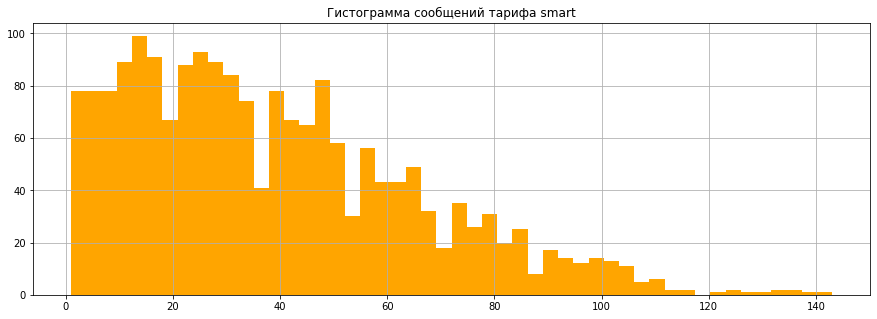

In [33]:
# строим гистограмму для тарифа smart
smart_users['total_messages'].hist(bins=50, figsize=(15,5), color='orange')
plt.title('Гистограмма сообщений тарифа smart')


Из гистограммы видим, что пользователи тарифа smart в среднем отправляют около 40 сообщений, посл е отметки 60 количество сообщений уменьшается, и видно, что пользователей, отправляющих больше 100 сообщений в месяц очень мало.

Text(0.5, 1.0, 'Гистограмма сообщений тарифа ultra')

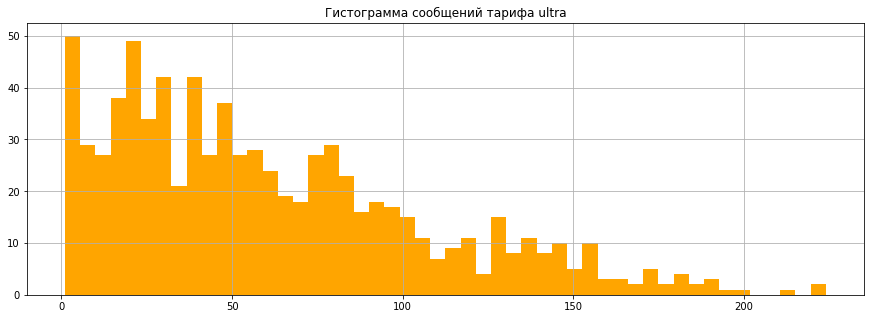

In [34]:
# строим гистограмму для тарифа ultra
ultra_users['total_messages'].hist(bins=50, figsize=(15,5), color='orange')
plt.title('Гистограмма сообщений тарифа ultra')

На данной гистограмме видим пик в отметке 0. Видимо, мноие пользователи тарифа не используют пакет сообщений. Видно, что данные распределены неравномерно. Оджнако среднее число сообщений находится в отметке 61. Стандартное отклонение для тарифа ultra = 45, это как раз объясняет одиночные пики на шрафике после отметки 60 и далее. Возможно, есть пользователи, которые очень любят смс.

### Вывод

Проанализировав данные сообщений 2х тарифов можно сделать вывод, что среднее и медианное количества сообщений в тарифах smart и ultra также отличается. Среднее значение сообщений по тарифу smart 38 и среднее значение сообщений по тарифу ultra 61. Пользоватнли тарифа ultra шлют существенно больше сообщений. 

Стандартное отклонение количества сообщений по тарифу smart составляет 26 и по тарифу ultra 45. Для тарифа ultra коллебания также выше.

Из гистограммы видим, что в основном количество сообщений для тарифа smart находится в итервале от 20 до 90. Однако на гистограмме видны пики после среднего значения, и медиана ниже среднего (51 vs 61 соответственно). Есть аномалии в более, чем 200 сообщений. В тарифе ultra пользователи, очевидно, пользуются сообщениями чаще, чем в тарифе smart.

### Проанализируем поведение пользователей тарифа smart  и ultra относительно трафика

In [35]:
# посмотрим на основную информацию по трафику по обоим тарифам
smart_users['total_traffic_gb'].describe()

count    2228.000000
mean       16.336176
std         5.737923
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: total_traffic_gb, dtype: float64

Видим, что в среднем пользователи тарифа smart используют 16 Гб в месяц. Медиана - 17 Гб, минимальное - 0 и максимальное - 38.

In [36]:
ultra_users['total_traffic_gb'].describe()

count    975.000000
mean      19.694359
std        9.702924
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: total_traffic_gb, dtype: float64

Видим, что в среднем пользователи тарифа smart используют больше интернета - 19 Гб в месяц. Медиана - 19 Гб, минимальное - 0 и максимальное - 49.

In [37]:
# считаем среднее для тарифа smart
mean_traffic_smart = smart_users['total_traffic_gb'].mean()
print("Среднее значение трафика по тарифу smart", mean_traffic_smart)

# считаем среднее дл тарифа ultra
mean_traffic_ultra = ultra_users['total_traffic_gb'].mean()
print("Среднее значение трафика по тарифу ultra", mean_traffic_ultra)

Среднее значение трафика по тарифу smart 16.33617594254937
Среднее значение трафика по тарифу ultra 19.694358974358973


In [38]:
# читаем дисперсию для трафика тарифа smart
variance_traffic_smart = np.var(smart_users['total_traffic_gb'], ddof=1)
print('Дисперсия для трафика тарифа smart', variance_traffic_smart)

# читаем дисперсию для трафика тарифа ultra
variance_traffic_ultra = np.var(ultra_users['total_traffic_gb'], ddof=1)
print('Дисперсия для трафика тарифа ultra', variance_traffic_ultra)

Дисперсия для трафика тарифа smart 32.92375582354312
Дисперсия для трафика тарифа ultra 94.14673405991682


In [39]:
# находим стандартное отклонение для трафика в тарифе smart
st_traffic_smart = np.sqrt(variance_traffic_smart)
print('Стандартное отклонение трафика по тарифу smart', st_traffic_smart)

# находим стандартное отклонение для трафика в тарифе ultra
st_traffic_ultra = np.sqrt(variance_traffic_ultra)
print('Стандартное отклонение трафика по тарифу ultra', st_traffic_ultra)

Стандартное отклонение трафика по тарифу smart 5.737922605224221
Стандартное отклонение трафика по тарифу ultra 9.70292399536948


Text(0.5, 1.0, 'Гистограмма трафика тарифа smart')

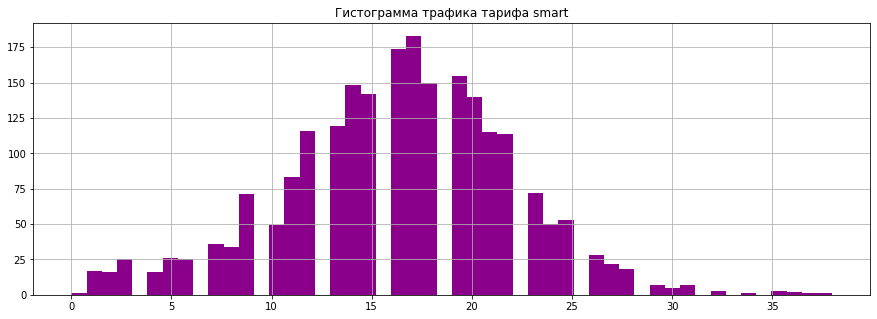

In [40]:
# строим гистограмму для тарифа smart
smart_users['total_traffic_gb'].hist(bins=50, figsize=(15,5), color='darkmagenta')
plt.title('Гистограмма трафика тарифа smart')

На гистограмме видим, что трафик в основном распределен междку значениями от 13 до 23 Гб в месяц. По форме гистограмма выдант нормальное распределение. Есть небольшой "хвост" из больших значений, однака после отметки 30 они почти не втречаются.

Text(0.5, 1.0, 'Гистограмма трафика тарифа ultra')

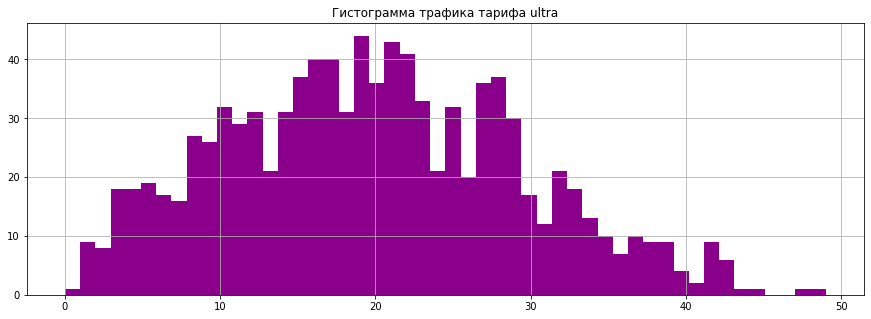

In [41]:
# строим гистограмму для тарифа ultra
ultra_users['total_traffic_gb'].hist(bins=50, figsize=(15,5), color='darkmagenta')
plt.title('Гистограмма трафика тарифа ultra')

На гистограмме трафика тарифа ultra видно, что значения распределены менее равномерно. Встречаются скачки после среднего. В основном данные распределены в промежутке 9 - 29 при равном среднем и медианном (19), при стандартном отклонении 9. 

### Вывод

Проанализировав данные трафика 2х тарифов можно сделать вывод, что среднее и медианное количества сообщений в тарифах smart и ultra также отличается. Среднее значение трафика по тарифу smart 16 и среднее значение по тарифу ultra 91. Пользоватнли тарифа ultra более активно пользуются интернетом.

Стандартное отклонение количества по тарифу smart составляет 5.7 и по тарифу ultra 9.7. Для тарифа ultra коллебания также выше.

Из гистограммы видим, что в основном объем трафика для тарифа smart находится в итервале от 13 до 23 Гб, а для тарифа ultra это 9 и 29. Есть аномалии в более, чем в 30 и 40 Гб соответственно. В тарифе ultra пользователи, очевидно, пользуются интренетом больше, чем в тарифе smart.

### Общий вывод по анализу

Проанализировав поведение пользователей тарифов smart и ultra можно выявить следующую закономерность. 
Пользователи тарифа ultra пользуются всеми видами услуг больше, что ожидаемо. 


In [42]:
# КОД РЕВЬЮЕРА

final_data.pivot_table(index='tariff', values=['duration', 'total_messages', 'total_traffic_gb'],
                       aggfunc=['mean', 'std', 'var'])

mean                                         std                 \
          duration total_messages total_traffic_gb    duration total_messages   
tariff                                                                          
smart   419.062978      38.716441        16.336176  189.325618      26.787949   
ultra   545.451104      61.161006        19.694359  306.925754      45.931026   

                                  var                                  
       total_traffic_gb      duration total_messages total_traffic_gb  
tariff                                                                 
smart          5.737923  35844.189551     717.594201        32.923756  
ultra          9.702924  94203.418396    2109.659183        94.146734

In [43]:
# КОД РЕВЬЮЕРА

# Это все для мультиндекса
l1 = ['duration', 'total_messages', 'total_traffic_gb']
l2 = ['mean', 'var', 'std']
idx = pd.MultiIndex.from_product([l1, l2])


print(idx)

print('\n\n\nИндексы: ', idx[0], 'Первый: ', idx[0][0], 'Второй: ', idx[0][1])

df = pd.DataFrame(index=['smart', 'ultra'], columns=idx)

for i in df.columns:
    #  Срез по первому индексу, агрегирование — по второму. 
    df.loc['smart',i] = np.round(final_data.query('tariff=="smart"')[i[0]].agg(i[1]),2)
    df.loc['ultra',i] = np.round(final_data.query('tariff=="ultra"')[i[0]].agg(i[1]),2)
    
df    

MultiIndex([(        'duration', 'mean'),
            (        'duration',  'var'),
            (        'duration',  'std'),
            (  'total_messages', 'mean'),
            (  'total_messages',  'var'),
            (  'total_messages',  'std'),
            ('total_traffic_gb', 'mean'),
            ('total_traffic_gb',  'var'),
            ('total_traffic_gb',  'std')],
           )



Индексы:  ('duration', 'mean') Первый:  duration Второй:  mean


duration                  total_messages                  \
          mean      var     std           mean      var    std   
smart   419.06  35844.2  189.33          38.72   717.59  26.79   
ultra   545.45  94203.4  306.93          61.16  2109.66  45.93   

      total_traffic_gb               
                  mean    var   std  
smart            16.34  32.92  5.74  
ultra            19.69  94.15   9.7

## Проверка гипотез

### Различается ли средняя выручка по тарифам

Проверяем гипотезу, что выручка тарифов smart и ultra различается. Пусть нулевая гипотеза Н0 значит, что средняя выручка равна, альтернативная Н1 - то, что выручка не равна. Пороговое значение 5%.

In [48]:
display(smart_users['total_income'].mean())
display(ultra_users['total_income'].mean())

1290.6778067885118

2048.936170212766

In [51]:
# проверим гипотезу, что средняя выручка от двух тарифов отличается
# зададим потоговое значение 5% и проверим двустороннюю гипотезу
smart_users.dropna(subset = ['total_income'], inplace=True)
ultra_users.dropna(subset = ['total_income'], inplace=True)

alpha = .05
results = st.ttest_ind(
    smart_users['total_income'],
    ultra_users['total_income'])

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение 1.1515961964890638e-119
Отвергаем нулевую гипотезу


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Проверяем гипотезу, что выручка тарифов в Москве и в других городах различается. Пусть нулевая гипотеза Н0 значит, что средняя выручка равна, альтернативная Н1 - то, что выручка не равна. Пороговое значение 5%.

In [52]:
# выделяем абонентов из Москвы и находим среднюю выручку для них
moscow_users = final_data.query('city == "Москва"')
mean_moscow_users = moscow_users['total_income'].mean()
print('Средняя выручка по Москве', mean_moscow_users)

# выделяем абонентов не из Москвы и находим среднюю выручку для них
other_users = final_data.query('city != "Москва"')
mean_other_users = other_users['total_income'].mean()
print('Средняя выручка по другим городам', mean_other_users)



Средняя выручка по Москве 1554.7107942973523
Средняя выручка по другим городам 1493.1456801470588


In [54]:
# # зададим потоговое значение 5% и проверим двустороннюю гипотезу
moscow_users.dropna(subset = ['total_income'], inplace=True)
other_users.dropna(subset = ['total_income'], inplace=True)

alpha = .05
results = st.ttest_ind(
    moscow_users['total_income'],
    other_users['total_income'])

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение 0.12167256176036186
Не получилось отвергнуть нулевую гипотезу


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Вывод по гипотезам

По итогам проведения t-тестов удалось выяснить:
- выручка по тарифам smart и ultra отличается,
- выручка по Москве и другим городам не различается.

## Общий вывод

В данном проекте исследовали данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно было проанализировать поведение клиентов и сделать вывод — какой тариф лучше для того, чтобы скорректировать рекламный бюджет.

На начальном этапе провели подготовку данных, поменяли типы данных и посчитали выручку по тарифам для каждого пользователя. 
Для некоторых столбцов изменили на datetime, чтобы можно было выделить месяц. В звонках и трафике были обнаружены нулевые значения, однако логичнее всего их не трогать, так как это значит, что человек либо не пользовался услугой в тарифе, либо это пропущенные звонки.

Далее посчитали для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, израсходованный трафик по месяцам, предварительно переведя мегабайты в гигабайты.

На последнем этапе посчитали выручку с каждого клиента.

Далее провели анализ данных с построением гистограмм. Проанализировав поведение пользователей тарифов smart и ultra можно выявить следующую закономерность. Пользователи тарифа ultra пользуются всеми видами услуг больше, что ожидаемо.

Далее провели t-тесты для проверки двусторонних гипотез. По итогам этих тестов выяснили, что:
выручка по тарифам smart и ultra отличается (пользователи терифа ultra приносят большую выручку),
выручка по Москве и другим городам не различается.

На основе анализа можно сделать следующий выводы:
- пользователи тарифа smart пользуются услугами пропорционально меньше, чем пользователи ultra. Это касается всех услуг: звонков(среднее 419 мин vs 545 мин), сообщений (38 vs 61) и интернета (16 vs 19 Гб). Однако, эта разница не слишком существенна, с учетом того, на сколько большую выручку приносит тариф ultra.
- выручка в Москве и регионах не отличается.
Таким образом, можно сделать вывод, что тариф ultra лучше.

